## country

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import pycountry

# 1. Carregar o shapefile mundial
world = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")


## 3. Corrigir possíveis nomes errados

In [2]:


correcoes = {
    'Russia': 'Russian Federation',
    'United States': 'United States of America',
    'Venezuela': 'Venezuela, Bolivarian Republic of',
    'South Korea': 'Korea, Republic of',
    'North Korea': 'Korea, Democratic People\'s Republic of',
    'Vietnam': 'Viet Nam',
    'Syria': 'Syrian Arab Republic',
    'Iran': 'Iran, Islamic Republic of',
    'Bolivia': 'Bolivia, Plurinational State of',
    'Tanzania': 'Tanzania, United Republic of',
    'Laos': 'Lao People\'s Democratic Republic',
    'Moldova': 'Moldova, Republic of',
    'Ivory Coast': 'Côte d\'Ivoire',
    'Czech Republic': 'Czechia',
    'Swaziland': 'Eswatini'
}


## Agora pode fazer o merge
### Criar um DataFrame com os dados fornecidos

In [107]:


dados_homicidios = pd.DataFrame({
    'country': ['Brazil', 'United States', 'Canada', 'United Kingdom', 'Germany', 'Spain', 'France', 'Portugal','Netherlands','Italy'],
    'homicide_rate': [21.1, 4.6, 1.91, 0.9, 0.91, 0.61, 9.5, 0.81,0.62,0.5],
    'References':['https://insightcrime.org/news/insight-crime-2024-homicide-round-up/?gad_source=1&gad_campaignid=22333700096#h-brazil-5-4',
                  'https://www.vitalcitynyc.org/dataviz/murder-rate-in-the-united-states-per-100000-1950-2024',
                  'https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3510006801',
                  'https://www.ons.gov.uk/peoplepopulationandcommunity/crimeandjustice/articles/homicideinenglandandwales/yearendingmarch2024#:~:text=Compared%20with%20most%20other%20crimes,March%202024%20(Figure%201)',
                  'https://sdg-indikatoren.de/en/16-1-1/',
                  'https://www.macrotrends.net/global-metrics/countries/esp/spain/murder-homicide-rate',
                  'https://www.macrotrends.net/global-metrics/countries/fra/france/death-rate',
                  'https://www.macrotrends.net/global-metrics/countries/prt/portugal/murder-homicide-rate',
                 'https://www.prison-insider.com/en/countryprofile/pays-bas-2024',
                  'https://ourworldindata.org/data-insights/homicide-rates-in-italy-have-dropped-by-80-since-1990#:~:text=Italy%20has%20become%20much%20safer,and%20%E2%80%9Cwhite%20collar%E2%80%9D%20crime.']
    })
# Corrigir possíveis nomes errados
dados_homicidios['country_corrigido'] = dados_homicidios['country'].replace(correcoes)

# Fazer o merge com o shapefile mundial
merged = world.merge(dados_homicidios[['country_corrigido', 'homicide_rate']], 
                     left_on='NAME_EN', right_on='country_corrigido', how='left')

# Verifique se houve algum país que não foi mapeado corretamente no merge


merged.to_excel('data/merged_homicides.xlsx', index=False)
print(list(merged['homicide_rate']))
# 6. Cores baseadas no valor de homicídios
brasil_value = merged.loc[merged["NAME_EN"] == 'Brazil', 'homicide_rate'].values[0] if not merged.loc[merged["NAME_EN"] == 'Brazil', 'homicide_rate'].empty else None
print(brasil_value)


[nan, nan, nan, 1.91, 4.6, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 21.1, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 9.5, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.91, nan, nan, nan, nan, nan, nan, nan, nan, 0.62, 0.81, 0.61, nan, nan, nan, nan, nan, nan, nan, nan, 0.5, nan, 0.9, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
21.1


## cores

In [108]:

def define_cor(row):
    if pd.isna(row['homicide_rate']):
        return 'lightgrey'
    elif row['NAME_EN'] == 'Brazil':
        return 'red'
    elif row['homicide_rate'] <= brasil_value:
        return 'blue'
    else:
        return 'lightgrey'

merged['color'] = merged.apply(define_cor, axis=1)

# 7. Recalcular a soma apenas dos azuis
azuis = merged[(merged['color'] == 'blue')]
soma_azuis = azuis['homicide_rate'].sum()


## 

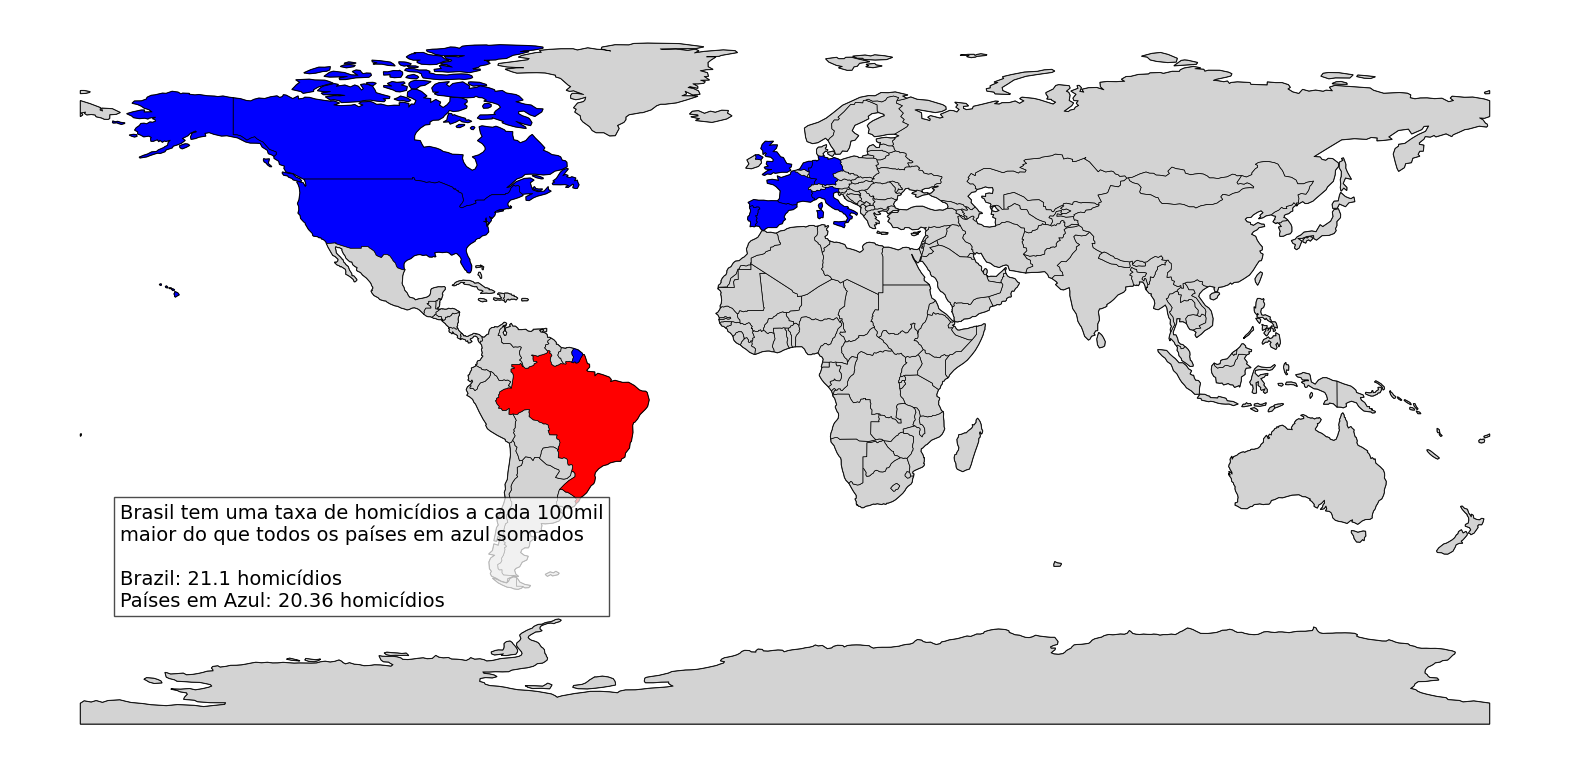

In [109]:

# 8. Plotar
fig, ax = plt.subplots(figsize=(20, 12))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
merged.plot(ax=ax, color=merged['color'], edgecolor='black', linewidth=0.5)

# 9. Texto
ax.text(-170, -60,
        f"Brasil tem uma taxa de homicídios a cada 100mil\nmaior do que todos os países em azul somados\n\n"
        f"Brazil: {(brasil_value):,} homicídios\n"
        f"Países em Azul: {(soma_azuis):,} homicídios",
        fontsize=14, color='black', bbox=dict(facecolor='white', alpha=0.7))

plt.axis('off')
plt.title("", fontsize=18)
plt.savefig("homicidios_mundo.png", dpi=900, bbox_inches='tight')

# outros

## Rate by Country

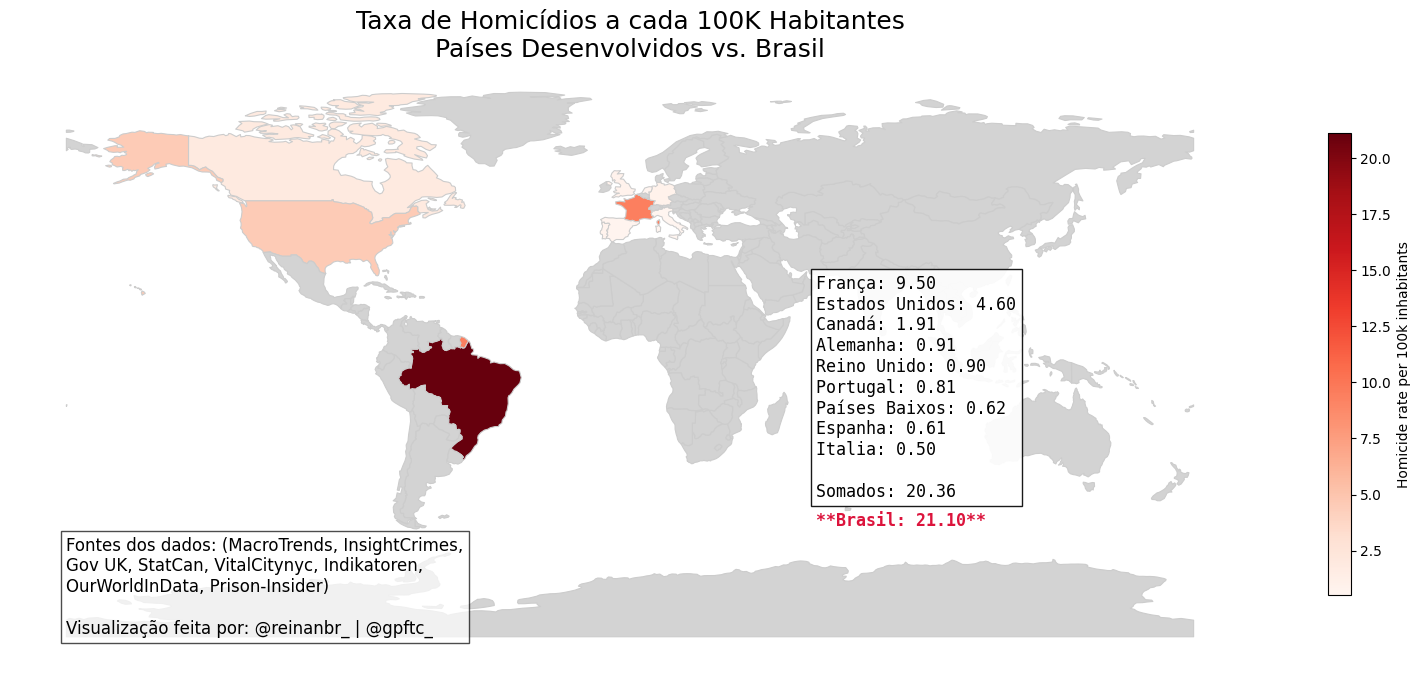

In [104]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# 1. Carregar o shapefile mundial
world = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

# 3. Corrigir possíveis nomes errados
correcoes = {
    'Russia': 'Russian Federation',
    'United States': 'United States of America',
    'Venezuela': 'Venezuela, Bolivarian Republic of',
    'South Korea': 'Korea, Republic of',
    'North Korea': 'Korea, Democratic People\'s Republic of',
    'Vietnam': 'Viet Nam',
    'Syria': 'Syrian Arab Republic',
    'Iran': 'Iran, Islamic Republic of',
    'Bolivia': 'Bolivia, Plurinational State of',
    'Tanzania': 'Tanzania, United Republic of',
    'Laos': 'Lao People\'s Democratic Republic',
    'Moldova': 'Moldova, Republic of',
    'Ivory Coast': 'Côte d\'Ivoire',
    'Czech Republic': 'Czechia',
    'Swaziland': 'Eswatini'
}

# Criar um DataFrame com os dados fornecidos
dados_homicidios = pd.DataFrame({
    'country': ['Brazil', 'United States', 'Canada', 'United Kingdom', 'Germany', 'Spain', 'France', 'Portugal','Netherlands','Italy'],
    'homicide_rate': [21.1, 4.6, 1.91, 0.9, 0.91, 0.61, 9.5, 0.81,0.62,0.5],
    'References':['https://insightcrime.org/news/insight-crime-2024-homicide-round-up/?gad_source=1&gad_campaignid=22333700096#h-brazil-5-4',
                  'https://www.vitalcitynyc.org/dataviz/murder-rate-in-the-united-states-per-100000-1950-2024',
                  'https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3510006801',
                  'https://www.ons.gov.uk/peoplepopulationandcommunity/crimeandjustice/articles/homicideinenglandandwales/yearendingmarch2024#:~:text=Compared%20with%20most%20other%20crimes,March%202024%20(Figure%201)',
                  'https://sdg-indikatoren.de/en/16-1-1/',
                  'https://www.macrotrends.net/global-metrics/countries/esp/spain/murder-homicide-rate',
                  'https://www.macrotrends.net/global-metrics/countries/fra/france/death-rate',
                  'https://www.macrotrends.net/global-metrics/countries/prt/portugal/murder-homicide-rate',
                 'https://www.prison-insider.com/en/countryprofile/pays-bas-2024',
                  'https://ourworldindata.org/data-insights/homicide-rates-in-italy-have-dropped-by-80-since-1990#:~:text=Italy%20has%20become%20much%20safer,and%20%E2%80%9Cwhite%20collar%E2%80%9D%20crime.']
    })

# Corrigir possíveis nomes errados
dados_homicidios['country_corrigido'] = dados_homicidios['country'].replace(correcoes)

# Fazer o merge com o shapefile mundial
merged = world.merge(dados_homicidios[['country_corrigido', 'homicide_rate']], 
                     left_on='NAME_EN', right_on='country_corrigido', how='left')

# Adicionar a coluna 'taxa' para ser usada no mapa
merged['taxa'] = merged['homicide_rate']

# 6. Criar o gráfico
fig, ax = plt.subplots(figsize=(20, 12))

# Plotando com map.plot e definindo cores personalizadas
merged.plot(
    column="taxa",
    cmap="Reds",
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8",
    legend=True,
    legend_kwds={'label': "Homicide rate per 100k inhabitants", 'orientation': "vertical",  'shrink': 0.5},
    missing_kwds={
        "color": "lightgrey",  # Definir a cor dos países sem dados
        "label": "No data",
        "edgecolor": "0.8",
        "linewidth": 0.8
    }
)

# Texto sobre o Brasil e países azuis
brasil_value = merged.loc[merged["NAME_EN"] == 'Brazil', 'homicide_rate'].values[0] if not merged.loc[merged["NAME_EN"] == 'Brazil', 'homicide_rate'].empty else None
azuis = merged[(merged['taxa'] <= brasil_value)]
soma_azuis = azuis['homicide_rate'].sum()

# Movendo o texto para abaixo do mapa

# Texto sobre a fonte dos dados e criador, abaixo do mapa
ax.text(-180, -89,
        "Fontes dos dados: (MacroTrends, InsightCrimes,\nGov UK, StatCan, VitalCitynyc, Indikatoren, \nOurWorldInData, Prison-Insider)\n"+
        "\nVisualização feita por: @reinanbr_ | @gpftc_",
        fontsize=12, color='black', ha='left', bbox=dict(facecolor='white', alpha=0.7))
# Tradução dos nomes
traducao_paises = {
    'Brazil': 'Brasil',
    'United States': 'Estados Unidos',
    'Canada': 'Canadá',
    'United Kingdom': 'Reino Unido',
    'Germany': 'Alemanha',
    'Spain': 'Espanha',
    'France': 'França',
    'Portugal': 'Portugal',
    'Netherlands':'Países Baixos',
    'Denmark':'Dinamarca',
    'Italy':'Italia'
}
dados_homicidios['pais_pt'] = dados_homicidios['country'].map(traducao_paises)

# Separar o Brasil dos outros
nao_brasil = dados_homicidios[dados_homicidios['country'] != 'Brazil']\
.sort_values(by='homicide_rate', ascending=False)

soma_nao_brasil = nao_brasil['homicide_rate'].sum()
taxa_brasil = dados_homicidios[dados_homicidios['country'] == 'Brazil']['homicide_rate'].values[0]

# Criar texto em formato de tabela
linhas = [f"{row['pais_pt']}: {row['homicide_rate']:.2f}" for _, row in nao_brasil.iterrows()]
linhas.append(f"\nSomados: {soma_nao_brasil:.2f}")
linhas.append(f"**Brasil: {taxa_brasil:.2f}**")  # Em negrito (só visual, não real no matplotlib)

texto_tabela = "\n".join(linhas)

# Exibir em um gráfico


# Anotar a tabela no gráfico
ax.text(.65, 0.65, "\n".join(linhas[:-1]), transform=ax.transAxes,
        fontsize=12, ha='left', va='top', family='monospace', bbox=dict(facecolor='white', alpha=0.9))

# Destaque negrito para Brasil (estilo visual apenas)
ax.text(.65, 0.65 - 0.036*len(linhas),  # linha após as outras
        f"**Brasil: {taxa_brasil:.2f}**", transform=ax.transAxes,
        fontsize=12, ha='left', va='top', family='monospace', fontweight='bold', color='crimson')

# Título

plt.axis('off')
plt.title("Taxa de Homicídios a cada 100K Habitantes\nPaíses Desenvolvidos vs. Brasil", fontsize=18)
plt.savefig("homicidios_mundo_com_colormap_e_coresfaltantes_com_texto.png", dpi=900, bbox_inches='tight')


In [33]:
dados_homicidios

,country,homicide_rate,References,country_corrigido
0,Brazil,21.60,https://insightcrime.org/news/insight-crime-20...,Brazil
1,United States,4.60,https://www.vitalcitynyc.org/dataviz/murder-ra...,United States of America
2,Canada,1.91,https://www150.statcan.gc.ca/t1/tbl1/en/tv.act...,Canada
3,United Kingdom,0.90,https://www.ons.gov.uk/peoplepopulationandcomm...,United Kingdom
4,Germany,0.91,https://sdg-indikatoren.de/en/16-1-1/,Germany
5,Spain,0.61,https://www.macrotrends.net/global-metrics/cou...,Spain
6,France,9.50,https://www.macrotrends.net/global-metrics/cou...,France
7,Portugal,0.81,https://www.macrotrends.net/global-metrics/cou...,Portugal


## States

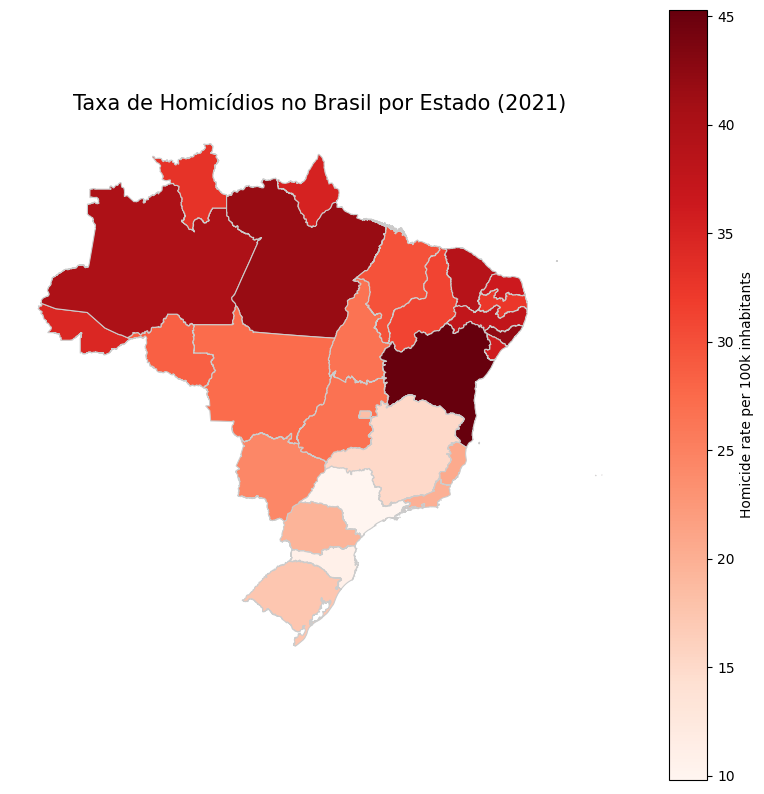

In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geobr import read_state

# 1. Carregar shapefile dos estados brasileiros via geobr
estados = read_state()

# 2. Tabela de homicídios (com siglas)
dados = {
    "estado": [
        "Acre", "Alagoas", "Amapá", "Amazonas", "Bahia", "Ceará", "Distrito Federal",
        "Espírito Santo", "Goiás", "Maranhão", "Mato Grosso", "Mato Grosso do Sul",
        "Minas Gerais", "Pará", "Paraíba", "Paraná", "Pernambuco", "Piauí", "Rio de Janeiro",
        "Rio Grande do Norte", "Rio Grande do Sul", "Rondônia", "Roraima", "Santa Catarina",
        "São Paulo", "Sergipe", "Tocantins"
    ],
    "taxa": [
        34.5, 42.2, 35.1, 39.8, 45.3, 38.9, 18.2, 20.5, 26.7, 29.9, 27.4, 24.3,
        15.1, 41.7, 32.5, 19.4, 37.6, 31.1, 19.9, 36.2, 17.3, 28.5, 33.0, 10.9,
        9.8, 36.0, 26.5
    ],
    "uf": [
        "AC", "AL", "AP", "AM", "BA", "CE", "DF",
        "ES", "GO", "MA", "MT", "MS",
        "MG", "PA", "PB", "PR", "PE", "PI", "RJ",
        "RN", "RS", "RO", "RR", "SC",
        "SP", "SE", "TO"
    ]
}

df_homi = pd.DataFrame(dados)

# 3. Merge dos dados com o shape usando sigla
mapa = estados.merge(df_homi, left_on="abbrev_state", right_on="uf", how="left")

# 4. Plotando o mapa
fig, ax = plt.subplots(figsize=(10, 10))
mapa.plot(
    column="taxa",
    cmap="Reds",
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8",
    legend=True,
    legend_kwds={'label': "Homicide rate per 100k inhabitants", 'orientation': "vertical"}
)

plt.title("Taxa de Homicídios no Brasil por Estado (2021)", fontsize=15)
plt.axis('off')
plt.savefig("homicidios_brasil.png", dpi=300, bbox_inches='tight')


## Cities Nordeste

## cities Pe/Ba